<a href="https://colab.research.google.com/github/Rohiniv17/FORE/blob/main/class_test_035045.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [48]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [49]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import matplotlib.pyplot as plt

In [50]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [51]:
path = "/content/sample_data/california_housing_train.csv/"

In [52]:
data = pd.read_csv("/content/sample_data/california_housing_train.csv")

In [53]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [54]:
data.shape

(17000, 9)

In [55]:
y = data.pop('median_house_value')

In [56]:
X = data

In [57]:
data.shape

(17000, 8)

In [58]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [59]:
data['total_bedrooms'].median()

434.0

In [60]:
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size = 0.25)

In [61]:
ss = StandardScaler()
ss.fit(X_train)


StandardScaler()

In [62]:
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)


In [63]:
model = tf.keras.Sequential()


In [64]:
model.add( tf.keras.layers.Input(shape = (8,) ))

In [65]:
model.add(tf.keras.layers.Dense(150, activation = 'relu'))


In [66]:
model.add(tf.keras.layers.Dense(150, activation = 'relu'))


In [67]:
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

In [68]:
from tensorflow.keras.utils import plot_model

In [73]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 150)               1350      
                                                                 
 dense_4 (Dense)             (None, 150)               22650     
                                                                 
 dense_5 (Dense)             (None, 1)                 151       
                                                                 
Total params: 24,151
Trainable params: 24,151
Non-trainable params: 0
_________________________________________________________________


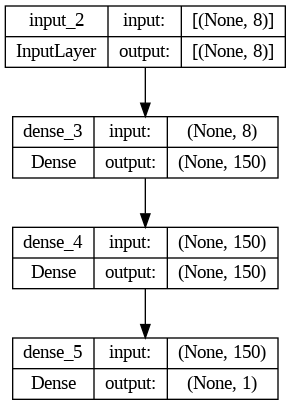

In [69]:
plot_model(model, show_shapes=True)


In [70]:
model.compile(
loss = 'binary_crossentropy',
optimizer = 'adam',
metrics = ['acc', 'mae']
 )

In [71]:
history1 = model.fit(X_train,y_train,
epochs = 100,
validation_data = (X_test, y_test)
)


Epoch 1/100
399/399 [==============================] - 2s 3ms/step - loss: -657311808.0000 - acc: 0.0000e+00 - mae: 207165.1562 - val_loss: -2798260992.0000 - val_acc: 0.0000e+00 - val_mae: 207704.5156
Epoch 2/100
399/399 [==============================] - 1s 3ms/step - loss: -10651628544.0000 - acc: 0.0000e+00 - mae: 207165.2031 - val_loss: -22915594240.0000 - val_acc: 0.0000e+00 - val_mae: 207704.5156
Epoch 3/100
399/399 [==============================] - 1s 3ms/step - loss: -44966432768.0000 - acc: 0.0000e+00 - mae: 207164.9219 - val_loss: -73894756352.0000 - val_acc: 0.0000e+00 - val_mae: 207704.5156
Epoch 4/100
399/399 [==============================] - 1s 3ms/step - loss: -114466160640.0000 - acc: 0.0000e+00 - mae: 207165.0312 - val_loss: -164179820544.0000 - val_acc: 0.0000e+00 - val_mae: 207704.5156
Epoch 5/100
399/399 [==============================] - 1s 3ms/step - loss: -225514962944.0000 - acc: 0.0000e+00 - mae: 207165.0625 - val_loss: -299296522240.0000 - val_acc: 0.0000e+

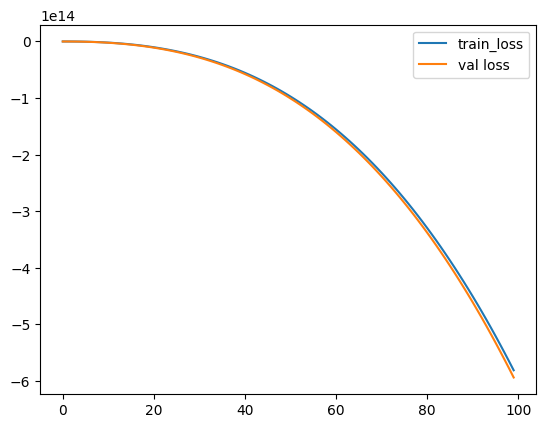

In [72]:
loss = history1.history['loss']
val_loss = history1.history['val_loss']
plt.plot(loss, label = "train_loss")
plt.plot(val_loss, label = "val loss")
plt.legend()

In [74]:
model.evaluate(X_test,y_test)

133/133 [==============================] - 0s 3ms/step - loss: -593608168177664.0000 - acc: 0.0000e+00 - mae: 207704.5156


[-593608168177664.0, 0.0, 207704.515625]